In [29]:
# steps
# 1. Preprocess + EDA + Feature extraction
# 2. Scale the values
# 3. Train test split
# 4. Train the model
# 5. Evaluate the model
# 6. Dpeloy the model

In [30]:
import pandas as pd
import numpy as np

In [31]:
df = pd.read_csv('/content/placement.csv')

In [32]:
df.shape

(100, 4)

In [33]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


We Can clearly see above that there is an unncessary column named "Unnamed" that we have to remove using preprocessing.

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.3 KB


In [36]:
#We can see that all the columns have not-null values.
#But there is one column that we have to remove

In [37]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [38]:
import matplotlib.pyplot as plt


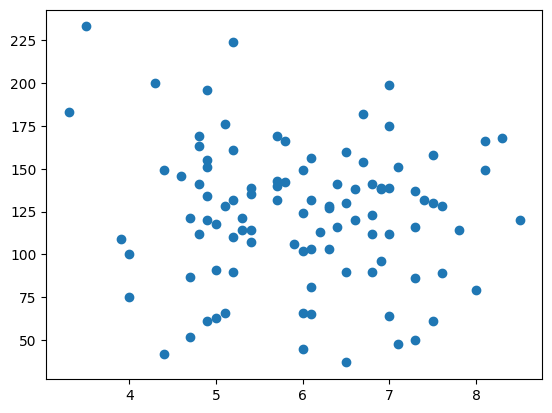

In [39]:
plt.scatter(df['cgpa'],df['iq'])

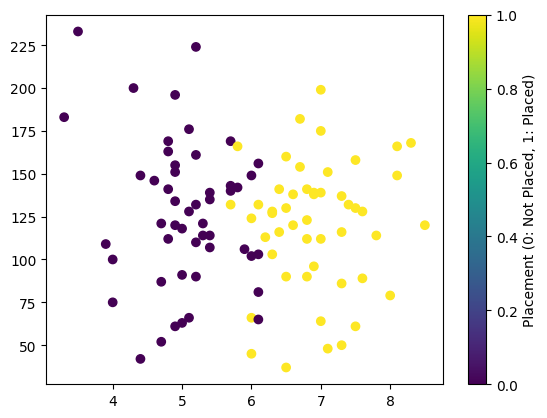

In [40]:
plt.scatter(df['cgpa'],df['iq'],c = df['placement'])
plt.colorbar(label='Placement (0: Not Placed, 1: Placed)')

In [43]:
#Now we need two varibles , the dependent variable Y
#and the independent variable X which will contain iq ansd CGPA
#which will be used to predict the Y or placement

X = df.iloc[:,1:3] #Take all rows and first two columns
Y = df.iloc[:,-1] #Take all rows and the last column

In [44]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [45]:
Y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [46]:
Y.shape

(100,)

In [47]:
X.shape

(100, 2)

In [49]:
from sklearn.model_selection import train_test_split

X_train, X_test , Y_train, Y_Test = train_test_split(X,Y,test_size=0.1)
#The above code means that the training will be done on 90 students as there are 100 students in total.
#and the testing will be done on test_size = 0.1 which means 10 studnets
#and all the testing and training will be done randomly

In [50]:
X_train #we can see that randomly any row is getting trained and similarily for others

,cgpa,iq
6,5.7,143.0
47,5.2,161.0
44,7.5,61.0
59,4.8,112.0
41,5.4,114.0
...,...,...
49,5.4,135.0
90,7.3,86.0
7,5.0,63.0
54,6.4,141.0


In [51]:
X_test

,cgpa,iq
36,5.7,140.0
34,4.8,163.0
10,6.0,45.0
77,7.3,50.0
98,6.3,103.0
57,6.5,130.0
58,8.0,79.0
35,6.8,90.0
27,6.0,124.0
73,4.9,61.0


# SCALING


# Why do we need to do scaling?

Scaling is an important preprocessing step in many machine learning algorithms. It helps to:

*   **Prevent features with larger values from dominating**: If features have very different ranges, algorithms that rely on distance calculations (like K-Nearest Neighbors or Support Vector Machines) can be biased towards features with larger values. Scaling brings all features to a similar range.
*   **Improve convergence of gradient-based optimization algorithms**: Algorithms like Gradient Descent converge faster when features are scaled.
*   **Ensure that all features contribute equally**: When features are on a similar scale, they all have a comparable impact on the model's performance.

In [52]:
from sklearn.preprocessing import StandardScaler


In [53]:
#creating an object
scalar = StandardScaler()

In [54]:
X_train = scalar.fit_transform(X_train)
#use of fit_Transform

# fit: This is like the "teaching" part. When you call scalar.fit(X_train), the StandardScaler object (scalar) learns the rules for scaling based on the X_train data. Specifically, it calculates the mean and standard deviation of each feature (CGPA and IQ) in the training data. It fits itself to this data to understand how it should perform the scaling.
# transform: This is like the "ironing" part. Once the scalar has learned the rules (calculated the means and standard deviations), scalar.transform(X_train) applies those rules to the X_train data. It uses the calculated means and standard deviations to scale each feature in X_train.
# fit_transform: This is simply a shortcut that does both steps at once. scalar.fit_transform(X_train) first learns the scaling rules from X_train and then immediately applies those rules to X_train.

In [55]:
X_train

array([[-0.22904785,  0.42733803],
       [-0.6621215 ,  0.889788  ],
       [ 1.33001732, -1.6793785 ],
       [-1.00858043, -0.36910359],
       [-0.48889204, -0.31772026],
       [-0.9219657 ,  0.19611304],
       [-0.22904785,  0.14472971],
       [ 0.7237142 , -0.36910359],
       [ 1.33001732,  0.09334638],
       [-0.9219657 ,  0.63287135],
       [ 0.89694366,  1.24947131],
       [ 0.81032893, -0.78017023],
       [-1.78811301, -0.44617858],
       [ 0.81032893,  0.32457137],
       [ 0.7237142 ,  0.3759547 ],
       [ 1.15678786,  0.27318804],
       [ 1.84970571,  1.01824632],
       [ 0.46387001, -0.93432022],
       [ 1.58986152, -0.31772026],
       [ 1.33001732,  0.812713  ],
       [-1.09519516, -1.01139521],
       [ 0.55048474,  0.2988797 ],
       [-1.70149828, -1.31969519],
       [-0.14243311,  1.01824632],
       [ 1.15678786, -0.26633693],
       [ 0.46387001, -2.29597846],
       [ 0.11741108,  0.76132967],
       [ 1.41663205,  0.04196305],
       [-0.57550677,

In [56]:
X_test = scalar.transform(X_test)

In [57]:
X_test

array([[-0.22904785,  0.35026303],
       [-1.00858043,  0.94117133],
       [ 0.03079635, -2.09044514],
       [ 1.15678786, -1.96198682],
       [ 0.29064054, -0.60032857],
       [ 0.46387001,  0.09334638],
       [ 1.76309098, -1.21692853],
       [ 0.7237142 , -0.93432022],
       [ 0.03079635, -0.06080361],
       [-0.9219657 , -1.6793785 ]])

NOW TIME TO TRAIN THE MODEL USING LOGISTIC REGRESSION AS THIS IS A CLASSIFIER PROBLEM

In [58]:
from sklearn.linear_model import LogisticRegression

In [62]:
clf = LogisticRegression()

In [63]:
#Model training
clf.fit(X_train,Y_train)

LogisticRegression()

In [74]:
#Now Evaluate the mdodel

Y_pred= clf.predict(X_test)
print(Y_pred)

[0 0 0 1 1 1 1 1 0 0]


In [71]:
#Above array is the model prediction
print(Y_Test)


#Now we can compare this Y_test data with the model's predicttion

36    0
34    0
10    1
77    1
98    1
57    1
58    1
35    1
27    1
73    0
Name: placement, dtype: int64


In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(Y_Test,Y_pred)

0.8

In [77]:
#So the accuracy score is coming out to be 80% which means out of 10 results , 8 will be correct

In [78]:
#Now we will plot the boundary that ML have seen to classify students to make predictions

from mlxtend.plotting import plot_decision_regions

<Axes: >

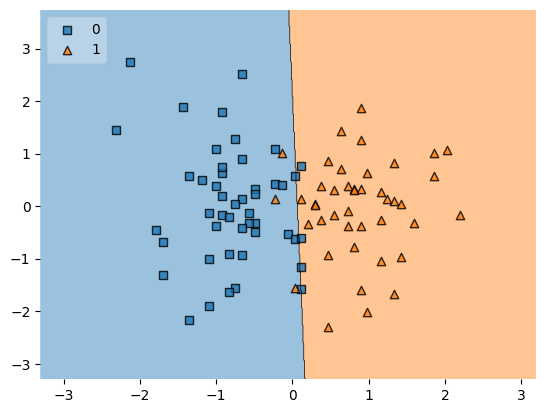

In [80]:
plot_decision_regions(X_train,Y_train.values,clf = clf , legend = 2)

# X_train: This is the training data (features - CGPA and IQ) that was used to train the model.
# The function uses this data to plot the individual data points.
# Y_train.values: This is the target variable (placement) for the training data.
# The .values is used to get the NumPy array representation of the pandas Series.
# This is used to color the data points according to their class (placed or not placed).
# clf = clf: This passes your trained logistic regression model (clf) to the function.
# The function uses this model to determine and plot the decision boundary.

In [81]:
import pickle

In [82]:
pickle.dump(clf,open('model.pkl','wb'))

pickle.dump(clf, open('model.pkl','wb'))
is basically saving your trained model into a file so you can use it later without training again.

Here’s the breakdown in plain words:

pickle → Think of it as a “packing machine” in Python.

It can take your Python object (like a trained model) and pack it into a format that can be saved to your computer.

Later, you can “unpack” it back into the same object.

clf → This is your trained model.

You’ve already trained it using data.

It contains all the “knowledge” it learned.

open('model.pkl','wb') →

model.pkl → The file name where your model will be saved.

'wb' → Means write in binary mode (because models aren’t saved as plain text).

pickle.dump(clf, file) →

This takes your clf model and writes it into the file in a special format.



In [ ]:
#Now we can deploy this to a website